<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_NewtonsMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Newton's Method

In the [Ch2_IntroToBisection.ipynb](https://github.com/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_IntroToBisection.ipynb) demo, we looked at [Lambert's W function](https://en.wikipedia.org/wiki/Lambert_W_function). Let's use this example again for root finding, but this time via Newton's method

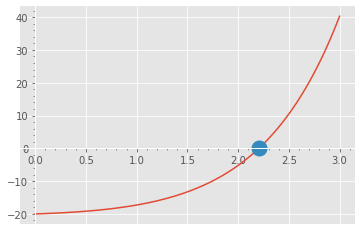

In [2]:
import numpy as np

x = 20
f = lambda y : y*np.exp(y) - x


# Let's also get a "true" answer, or at least a fairly good one
import scipy.special.lambertw as W

trueAnswer = np.real( W(20) )
relError = lambda guess : abs( guess - trueAnswer )/abs(trueAnswer)
correctDigits = lambda guess : -np.log10( relError(guess) + 1e-17)

# Plotting

yGrid = np.linspace(0,3,100)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots()
plt.plot(yGrid,f(yGrid))
plt.plot( trueAnswer,f(trueAnswer),'o',markersize=15)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.minorticks_on()

## Task: implement Newton's Method

1. Start with a simple implementation that runs the iterations, maybe printing out the value of x and f(x) at every iteration.  Run the method for a fixed number of iterations (like 20)
2. You can make fancier implementations that **save** a list of x and f(x) in case you want to display or plot them later
3. You can implement any of the stopping criteria discussed in our book, e.g.,
  - $|x_n - x_{n-1}| \le \epsilon$
  - $\frac{|x_n - x_{n-1}|}{\max\{|x_,10^{-15}\}} \le \epsilon$
  - $|f(x_n)| \le \epsilon$ 

In [3]:
def Newton(f,fprime,x0,maxIter = 100):
  history_x  = np.zeros(maxIter)
  history_fx = np.zeros(maxIter)
  x   = np.asarray(x0).copy()
  fx  = f(x)
  history_x[n]  = x
  history_fx[n] = fx
  for n in range(1,maxIter):
    x  = x - fx/fprime(x)
    fx = f(x)
    history_x[n] = x
    history_fx[n] = fx
  return x, history_x, history_fx

In [ ]:
# Now, run Newton's method on the function f
fprime = lambda y : np.exp(y) + y*np.exp(y)

p = Newton(f,fprime,2,20)

## Task: implement the Secant Method
You'll notice one important detail: we need to specify **two** initial points, $x_0$ and $x_1$

### Task: compare Newton's method, the Secant method, and bisection method

## Task: "break" Newton's method